# Supervised Algorithms
---

## 1. Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 2. Loading the Dataset

In [3]:
df = pd.read_csv('HistoricalQuotes.csv')

In [4]:
df.head(5)

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


## 3. EDA

In [5]:
df.dtypes

Date           object
 Close/Last    object
 Volume         int64
 Open          object
 High          object
 Low           object
dtype: object

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Date           0
 Close/Last    0
 Volume        0
 Open          0
 High          0
 Low           0
dtype: int64

In [8]:
df = df.rename(columns={' Close/Last': 'Close', ' Volume': 'Volume', ' Open': 'Open', ' High': 'High', ' Low': 'Low'})

In [9]:
df['Close'] = df['Close'].replace({'\$':''}, regex = True)
df['Open'] = df['Open'].replace({'\$':''}, regex = True)
df['High'] = df['High'].replace({'\$':''}, regex = True)
df['Low'] = df['Low'].replace({'\$':''}, regex = True)

In [10]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer()

In [11]:
imp.fit(df.iloc[:, 1:])
df.iloc[:,1:] = imp.transform(df.iloc[:,1:])

In [12]:
df['Volume'] = df['Volume'] / 10000000
df.rename(columns = {'Volume':'Volume (10^7)'}, inplace=True)

<AxesSubplot:>

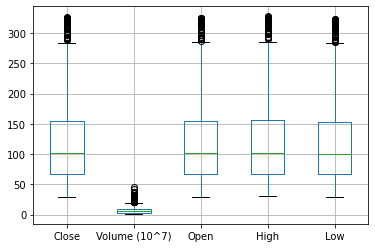

In [13]:
df.boxplot()

In [14]:
df.describe()

,Close,Volume (10^7),Open,High,Low
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000
mean,114.769522,7.258009,114.728443,115.766415,113.690582
std,60.662405,5.663113,60.546893,61.134456,60.085105
min,29.835700,1.136205,29.392800,29.928600,28.464300
25%,66.822475,3.053027,66.877150,67.475300,66.372950
50%,101.090000,5.295469,101.115000,102.085000,100.350000
75%,154.630000,9.861006,154.610000,155.735000,153.325000
max,327.200000,46.244233,324.740000,327.850000,323.350000


## 4. Implementing Auto-ARIMA

In [15]:
df1 = df

In [16]:
df1['Date'] = pd.to_datetime(df1.Date,format='%m/%d/%Y')
df1.index = df1['Date']

In [17]:
df1.head(5)

,Date,Close,Volume (10^7),Open,High,Low
Date,,,,,,
2020-02-28,2020-02-28,273.36,10.672120,257.26,278.41,256.37
2020-02-27,2020-02-27,273.52,8.015138,281.10,286.00,272.96
2020-02-26,2020-02-26,292.65,4.967843,286.53,297.88,286.50
2020-02-25,2020-02-25,288.08,5.766836,300.95,302.53,286.13
2020-02-24,2020-02-24,298.18,5.554883,297.26,304.18,289.23


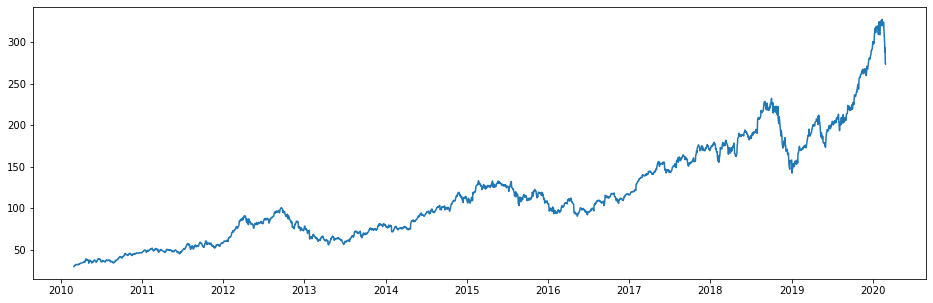

In [114]:
plt.figure(figsize=(16,5))
plt.plot(df1['Close'], label='Close Price history')

In [21]:
from pmdarima.arima import auto_arima

In [108]:
data = df1.sort_index(ascending=True, axis=0)

new_data = pd.DataFrame(index=range(0,len(df1)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]
    
#### Creating predictions for the validation set and check the RMSE using the actual values. Making predictions:
train = new_data[:1763]
valid = new_data[1763:]

y_train = train['Close']
y_valid = valid['Close']

model = auto_arima(y_train, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=8.98 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=7254.752, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6701.535, Time=0.37 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=5.17 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=7255.748, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=6537.920, Time=0.76 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=11.56 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.63 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=6538.133, Time=0.57 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=6538.814, Time=2.76 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=6539.477, Time=2.70 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=6537.811, Time=1.43 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=6701.462, Time=0.70 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=9.72 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [109]:
forecast = model.predict(n_periods=755)
forecast = pd.DataFrame(forecast,index = y_valid.index,columns=['Prediction'])

In [110]:
rms_arima=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(forecast)),2)))
print(f"The Root Mean Square Value : {rms_arima}")

The Root Mean Square Value : 216.45229926579114


In [111]:
mae_arima = np.mean(np.absolute(np.array(y_valid)-np.array(forecast)))
print(f"The Mean Absolute Error Value : {mae_arima}")


The Mean Absolute Error Value : 179.4031199945296


In [112]:
mape_arima = np.mean(np.absolute(1-(np.array(forecast) / np.array(y_valid))))
print(f"The Mean Absolute Percentage Error Value : {mape_arima}")

The Mean Absolute Percentage Error Value : 0.999106978163917


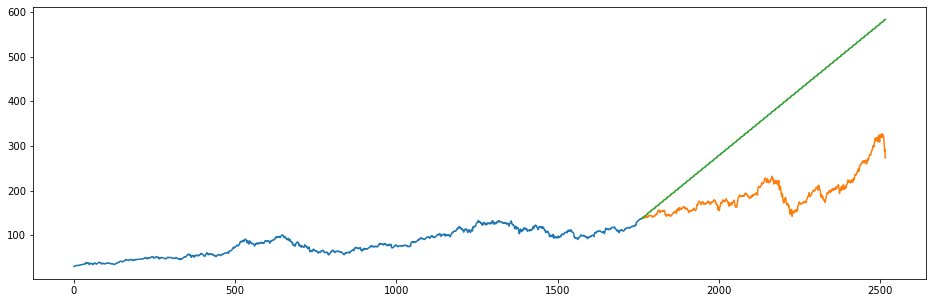

In [113]:
#plot
plt.figure(figsize=(16,5))
plt.plot(y_train)
plt.plot(y_valid)
plt.plot(forecast['Prediction'])

## 5. Implementing XGBoost

In [31]:
import xgboost as xg
from sklearn.model_selection import train_test_split

In [32]:
df2 = df
df2 = df2.sort_index(ascending=True, axis=0)

In [33]:
df2.head(5)

,Date,Close,Volume (10^7),Open,High,Low
Date,,,,,,
2010-03-01,2010-03-01,29.8557,13.731204,29.3928,29.9286,29.3500
2010-03-02,2010-03-02,29.8357,14.148628,29.9900,30.1186,29.6771
2010-03-03,2010-03-03,29.9043,9.284649,29.8486,29.9814,29.7057
2010-03-04,2010-03-04,30.1014,8.959191,29.8971,30.1314,29.8043
2010-03-05,2010-03-05,31.2786,22.464743,30.7057,31.3857,30.6614


In [34]:
X, y= df2.drop(['Close', 'Date'], axis=1), df2['Close']

In [35]:
# Splitting
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, shuffle=False)

In [36]:
# Train and test set are converted to DMatrix objects,
# as it is required by learning API.
train_dmatrix = xg.DMatrix(data = train_X, label = train_y)
test_dmatrix = xg.DMatrix(data = test_X, label = test_y)

In [37]:
# Parameter dictionary specifying base learner
param = {"booster":"gblinear", "objective":"reg:squarederror"}

In [38]:
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)

In [39]:
from sklearn.metrics import mean_squared_error as MSE

In [40]:
# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

RMSE :  14.770982


In [84]:
mae_xgb = np.mean(np.absolute(np.array(test_y)-np.array(pred)))
print(f"The Mean Absolute Error Value for XGBoost is : {mae_xgb}")

The Mean Absolute Error Value for XGBoost is : 13.105213104732455


In [85]:
mape_xgb = np.mean(np.absolute(1-(np.array(pred) / np.array(test_y))))
print(f"The Mean Absolute Percentage Error Value : {mape_xgb}")

The Mean Absolute Percentage Error Value : 0.06445964187570392


In [41]:
predDF = pd.DataFrame(np.squeeze(pred))

In [51]:
pred2 = pred
test_y1 = test_y

In [60]:
pred2.index = test_y1.index

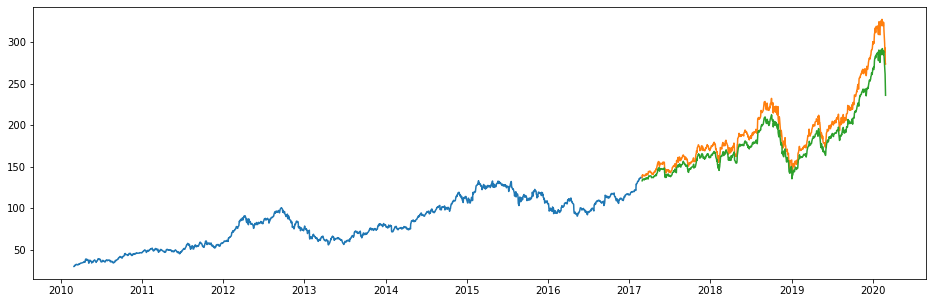

In [68]:
plt.figure(figsize=(16, 5))
plt.plot(train_y)
plt.plot(test_y)
plt.plot(pred2)

## 6. Implementing LSTM

In [69]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [94]:
df3 = df

In [95]:
#creating dataframe
data = df3.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [96]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [97]:
#creating train and test sets
dataset = new_data.values

train = dataset[:1763,:]
valid = dataset[1763:,:]

In [98]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [78]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
1703/1703 - 27s - loss: 3.2942e-04 - 27s/epoch - 16ms/step
Epoch 2/10
1703/1703 - 23s - loss: 1.2283e-04 - 23s/epoch - 13ms/step
Epoch 3/10
1703/1703 - 23s - loss: 9.3385e-05 - 23s/epoch - 13ms/step
Epoch 4/10
1703/1703 - 23s - loss: 6.6746e-05 - 23s/epoch - 13ms/step
Epoch 5/10
1703/1703 - 23s - loss: 6.1734e-05 - 23s/epoch - 13ms/step
Epoch 6/10
1703/1703 - 24s - loss: 5.4501e-05 - 24s/epoch - 14ms/step
Epoch 7/10
1703/1703 - 25s - loss: 4.8025e-05 - 25s/epoch - 15ms/step
Epoch 8/10
1703/1703 - 24s - loss: 4.9326e-05 - 24s/epoch - 14ms/step
Epoch 9/10
1703/1703 - 23s - loss: 4.9830e-05 - 23s/epoch - 14ms/step
Epoch 10/10
1703/1703 - 23s - loss: 4.6900e-05 - 23s/epoch - 14ms/step


In [99]:
#predicting values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

24/24 [==============================] - 0s 12ms/step


In [100]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print(f"The Root Mean Square Value : {rms}")

The Root Mean Square Value : 5.633869531903566


In [103]:
mae_lstm = np.mean(np.absolute(np.array(closing_price)-np.array(valid)))
print(f"The Mean Absolute Error Value for LSTM is : {mae_lstm}")

The Mean Absolute Error Value for LSTM is : 3.5884187569523474


In [104]:
mape_lstm = np.mean(np.absolute(1-(np.array(closing_price) / np.array(valid))))
print(f"The Mean Absolute Percentage Error Value : {mape_lstm}")

The Mean Absolute Percentage Error Value : 0.016842609935427074


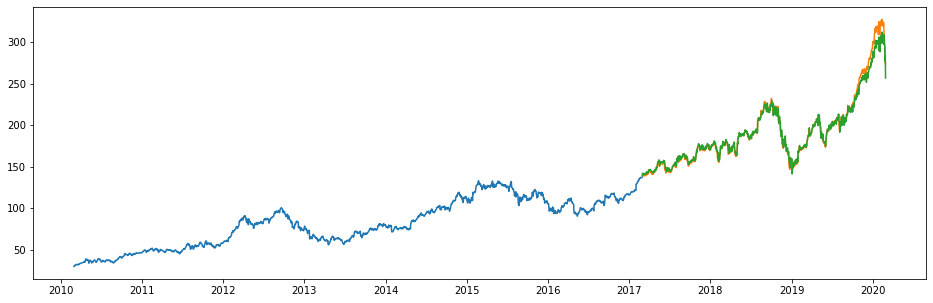

In [82]:
#for plotting
train = new_data[:1763]
valid = new_data[1763:]
valid['Predictions'] = closing_price
plt.figure(figsize=(16, 5))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

## 7. Supervised Algorithms Results

| Parameter | Auto-ARIMA | XGBoost | LSTM |
| ----------- | ----------- | ----------- | ----------- |
| Root Mean Square Error | 216.45 | 14.77 | 5.63 |
| Mean Absolute Error | 179.40 | 13.10 | 3.58 |
| Mean Absolute Percentage Error | 0.99 | 0.064 | 0.016 |